In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd drive/MyDrive/FIGMA/RP/

/content/drive/MyDrive/FIGMA/RP


In [ ]:
df=pd.read_csv('borrwoings-1960-2022.csv')
df=df.drop(columns={"Unnamed: 0"})

In [ ]:
df.head()

,Year,ExternalDebt_Adjusted
0,1960-03-31,1.406432e+09
1,1960-06-30,1.406581e+09
2,1960-09-30,1.406730e+09
3,1960-12-31,1.406878e+09
4,1961-03-31,1.407026e+09


In [ ]:

print(len(df))
df.head()

249


,Year,ExternalDebt_Adjusted
0,1960-03-31,1.406432e+09
1,1960-06-30,1.406581e+09
2,1960-09-30,1.406730e+09
3,1960-12-31,1.406878e+09
4,1961-03-31,1.407026e+09


In [ ]:
## Stationary Test
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df.ExternalDebt_Adjusted)

ADF Test Statistic : -0.7335547667663336
p-value : 0.8378656290065493
#Lags Used : 9
Number of Observations Used : 239
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: >

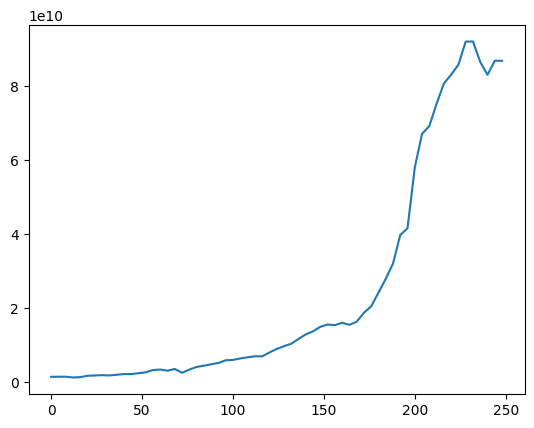

In [ ]:
df.ExternalDebt_Adjusted.plot()

In [ ]:
#Stationrizing the data
#Differencing by 1
df['ExternalDebt_Adjusted_Diff_1']=df['ExternalDebt_Adjusted']-df['ExternalDebt_Adjusted'].shift(1)
#Differencing by 4
df['ExternalDebt_Adjusted_Diff_20']=df['ExternalDebt_Adjusted']-df['ExternalDebt_Adjusted'].shift(20)

In [ ]:
df

,Year,ExternalDebt_Adjusted,ExternalDebt_Adjusted_Diff_1,ExternalDebt_Adjusted_Diff_20
0,1960-03-31,1.406432e+09,NaN,NaN
1,1960-06-30,1.406581e+09,1.494055e+05,NaN
2,1960-09-30,1.406730e+09,1.487969e+05,NaN
3,1960-12-31,1.406878e+09,1.481884e+05,NaN
4,1961-03-31,1.407026e+09,1.475798e+05,NaN
...,...,...,...,...
244,2021-03-31,8.688279e+10,9.532990e+08,1.066213e+09
245,2021-06-30,8.688279e+10,9.128646e+02,-4.950490e+08
246,2021-09-30,8.688279e+10,3.042882e+02,-2.056311e+09
247,2021-12-31,8.688279e+10,-3.042882e+02,-3.617573e+09


<Axes: >

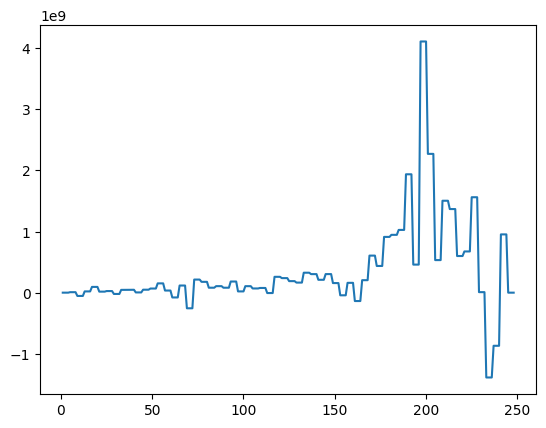

In [ ]:
df['ExternalDebt_Adjusted_Diff_1'].plot()


<Axes: >

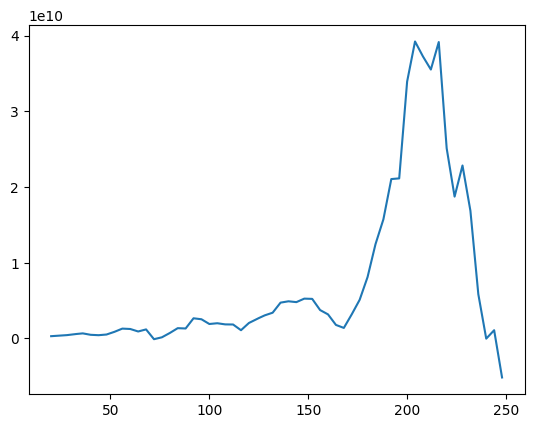

In [ ]:
df['ExternalDebt_Adjusted_Diff_20'].plot()

In [ ]:
df

,Year,ExternalDebt_Adjusted,ExternalDebt_Adjusted_Diff_1,ExternalDebt_Adjusted_Diff_20
0,1960-03-31,1.406432e+09,NaN,NaN
1,1960-06-30,1.406581e+09,1.494055e+05,NaN
2,1960-09-30,1.406730e+09,1.487969e+05,NaN
3,1960-12-31,1.406878e+09,1.481884e+05,NaN
4,1961-03-31,1.407026e+09,1.475798e+05,NaN
...,...,...,...,...
244,2021-03-31,8.688279e+10,9.532990e+08,1.066213e+09
245,2021-06-30,8.688279e+10,9.128646e+02,-4.950490e+08
246,2021-09-30,8.688279e+10,3.042882e+02,-2.056311e+09
247,2021-12-31,8.688279e+10,-3.042882e+02,-3.617573e+09


In [ ]:
adfuller_test(df.ExternalDebt_Adjusted_Diff_20.dropna())

ADF Test Statistic : -3.4815682970219575
p-value : 0.008473270812165536
#Lags Used : 13
Number of Observations Used : 215
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


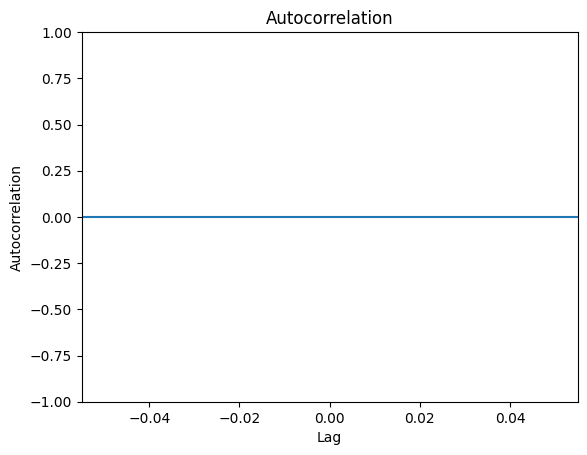

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


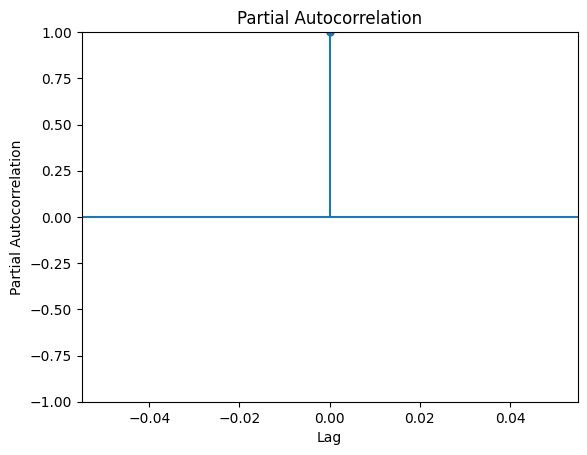

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#acf and pacf plots
#p-value -> pacf 0,1,
#q-value -> acf 0,
#ARIMA(p,d,q)


# Assuming you have differenced time series data stored in a pandas Series called 'diff_series'
# If your data is in a different format, you may need to adjust the code accordingly

# Plot the autocorrelation function (ACF)
plot_acf(df['ExternalDebt_Adjusted_Diff_20'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the partial autocorrelation function (PACF)
plot_pacf(df['ExternalDebt_Adjusted_Diff_20'])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()



In [ ]:
df=df.set_index('Year')


In [ ]:
df['ExternalDebt_Adjusted_Diff_20'].dropna()

Year
1965-03-31    2.769707e+08
1965-06-30    2.936289e+08
1965-09-30    3.102871e+08
1965-12-31    3.269454e+08
1966-03-31    3.436036e+08
                  ...     
2021-03-31    1.066213e+09
2021-06-30   -4.950490e+08
2021-09-30   -2.056311e+09
2021-12-31   -3.617573e+09
2022-03-31   -5.178834e+09
Name: ExternalDebt_Adjusted_Diff_20, Length: 229, dtype: float64

In [ ]:
#Dividing the Dataset

new_df=df['ExternalDebt_Adjusted_Diff_20'].dropna()
# Calculate the split point
split_point = int(len(new_df) * 0.75)

# Create the train series
train_series = new_df[:split_point]

# Create the test series
test_series = new_df[split_point:]


##  **ARIMA**


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
ar_train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1)).flatten()
ar_test_scaled = scaler.transform(test_series.values.reshape(-1, 1)).flatten()

# Fit the ARIMA model
model = ARIMA(ar_train_scaled, order=(1, 20, 0))
model_fit = model.fit()

# Make predictions on the test set
ar_predictions_scaled = model_fit.predict(start=len(ar_train_scaled), end=len(ar_train_scaled) + len(ar_test_scaled) - 1)

# Inverse transform the predictions to obtain the original scale
predictions = scaler.inverse_transform(ar_predictions_scaled.reshape(-1, 1)).flatten()

# Convert predictions to binary labels based on a threshold
threshold = 0.5  # Adjust this threshold based on your problem
predicted_labels = [1 if p >= threshold else 0 for p in predictions]

# Convert actual values to binary labels based on a threshold
actual_labels = [1 if a >= threshold else 0 for a in test_series]

# Calculate MAPE
mape = np.mean(np.abs((ar_test_scaled - ar_predictions_scaled) / ar_test_scaled)) * 100

# Calculate MAE
mae = mean_absolute_error(ar_test_scaled, ar_predictions_scaled)

# Calculate RMSE
rmse = mean_squared_error(ar_test_scaled, ar_predictions_scaled, squared=False)

# Print the F1 score
print("MAPE:", mape)
# Print the MAE and RMSE
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 1.0403486207900349e+21
MAE: 8.2904066054269e+18
RMSE: 2.4410577501672706e+19


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


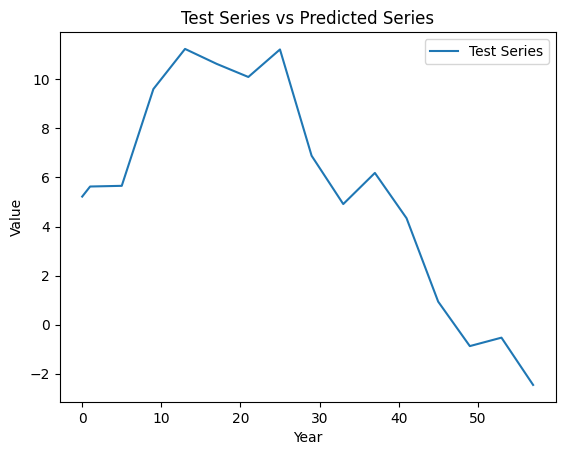

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a line chart
plt.plot(ar_test_scaled, label='Test Series')
#plt.plot(ar_test_scaled, label='Predicted Series')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Test Series vs Predicted Series')

# Add a legend
plt.legend()

# Display the chart
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1)).flatten()
test_scaled = scaler.transform(test_series.values.reshape(-1, 1)).flatten()

# Fit the ARIMA model
model = ARIMA(train_scaled, order=(1, 20, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions_scaled = model_fit.predict(start=len(train_scaled), end=len(train_scaled) + len(test_scaled) - 1)

# Inverse transform the predictions to obtain the original scale
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Convert predictions to binary labels based on a threshold
threshold = 0.5 
predicted_labels = [1 if p >= threshold else 0 for p in predictions]

# Convert actual values to binary labels based on a threshold
actual_labels = [1 if a >= threshold else 0 for a in test_series]

# Calculate MAPE
mape = np.mean(np.abs((test_scaled - predictions_scaled) / test_scaled)) * 100

# Calculate MAE
mae = mean_absolute_error(test_scaled, predictions_scaled)

# Calculate RMSE
rmse = mean_squared_error(test_scaled, predictions_scaled, squared=False)

# Print the F1 score
print("MAPE:", mape)
# Print the MAE and RMSE
print("MAE:", mae)
print("RMSE:", rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAPE: 1.963702474732802e+20
MAE: 1.5022144294115466e+18
RMSE: 4.3341460315034173e+18


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## **ES Model**

In [ ]:
new_df

Year
1965-03-31    2.769707e+08
1965-06-30    2.936289e+08
1965-09-30    3.102871e+08
1965-12-31    3.269454e+08
1966-03-31    3.436036e+08
                  ...     
2021-03-31    1.066213e+09
2021-06-30   -4.950490e+08
2021-09-30   -2.056311e+09
2021-12-31   -3.617573e+09
2022-03-31   -5.178834e+09
Name: ExternalDebt_Adjusted_Diff_20, Length: 229, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import f1_score

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
es_train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1)).flatten()
es_test_scaled = scaler.transform(test_series.values.reshape(-1, 1)).flatten()

# Choose the appropriate exponential smoothing method
model = ExponentialSmoothing(es_train_scaled, trend='add', seasonal='add', seasonal_periods=4)

# Fit the exponential smoothing model
model_fit = model.fit()


es_forecast = model_fit.forecast(len(es_test_scaled))

# Calculate MAPE
mape = np.mean(np.abs((es_test_scaled - es_forecast) / es_test_scaled)) * 100

# Calculate MAE
mae = mean_absolute_error(es_test_scaled, es_forecast)

# Calculate RMSE
rmse = mean_squared_error(es_test_scaled, es_forecast, squared=False)

# Print the F1 score
print("MAPE:", mape)
# Print the MAE and RMSE
print("MAE:", mae)
print("RMSE:", rmse)


MAPE: 2191.8612625959818
MAE: 11.251338885429151
RMSE: 15.266680593981098


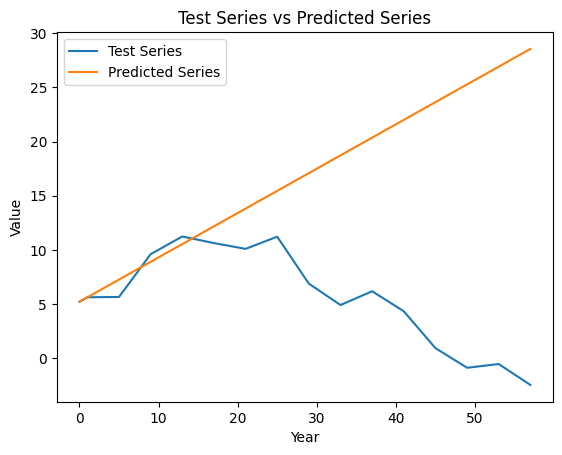

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a line chart
plt.plot(es_test_scaled, label='Test Series')
plt.plot(es_forecast, label='Predicted Series')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Test Series vs Predicted Series')

# Add a legend
plt.legend()

# Display the chart
plt.show()


## **GARCH**
Genralized Autoregressive Conditonal Heteroskedasticity


In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.8/915.8 kB 15.2 MB/s eta 0:00:00


In [ ]:
import arch
from statsmodels.stats.diagnostic import acorr_ljungbox

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
g_train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1)).flatten()
g_test_scaled = scaler.transform(test_series.values.reshape(-1, 1)).flatten()


# Fit the GARCH model to the training data
model = arch.arch_model(g_train_scaled, vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(start=len(g_test_scaled))
# Convert the forecasted values to an array
forecast_values = forecast.mean.values[-len(g_test_scaled):]


# Calculate MAPE
mape = np.mean(np.abs((g_test_scaled - forecast_values) / g_test_scaled)) * 100

# Calculate MAE
mae = mean_absolute_error(g_test_scaled, forecast_values)

# Calculate RMSE
rmse = mean_squared_error(g_test_scaled, forecast_values, squared=False)

# Print the F1 score
print("MAPE:", mape)
# Print the MAE and RMSE
print("MAE:", mae)
print("RMSE:", rmse)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 200377285054.8475
Iteration:      2,   Func. Count:     15,   Neg. LLF: 139.29479620523364
Iteration:      3,   Func. Count:     21,   Neg. LLF: 156209480.6322869
Iteration:      4,   Func. Count:     27,   Neg. LLF: 261.88590329170154
Iteration:      5,   Func. Count:     33,   Neg. LLF: 183.0297263894632
Iteration:      6,   Func. Count:     39,   Neg. LLF: 263.0048021737392
Iteration:      7,   Func. Count:     45,   Neg. LLF: 903.777950686166
Iteration:      8,   Func. Count:     51,   Neg. LLF: 452.2595403577004
Iteration:      9,   Func. Count:     57,   Neg. LLF: 142.23080056434526
Iteration:     10,   Func. Count:     63,   Neg. LLF: 160.43119204845618
Iteration:     11,   Func. Count:     69,   Neg. LLF: 1244.078475072727
Iteration:     12,   Func. Count:     75,   Neg. LLF: 15827.06369391016
Iteration:     13,   Func. Count:     81,   Neg. LLF: 362.73271078896846
Iteration:     14,   Func. Count:     87,   Neg. LLF: 285.29

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


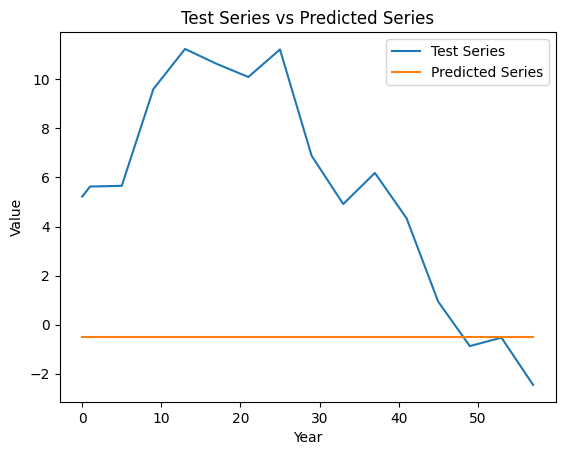

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a line chart
plt.plot(g_test_scaled, label='Test Series')
plt.plot(forecast_values, label='Predicted Series')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Test Series vs Predicted Series')

# Add a legend
plt.legend()

# Display the chart
plt.show()


##**AUTOENCODER**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming you have a dataset of currency exchange rates stored in a numpy array
# X_train = Training data
# X_test = Testing data

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
a_train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1))
a_test_scaled = scaler.transform(test_series.values.reshape(-1, 1))


# Define the dimensions of the input data
input_dim = a_train_scaled.shape[1]

# Define the dimensions of the hidden layers
encoding_dim = 64

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder layers
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder layers
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder model
autoencoder.fit(a_train_scaled, a_train_scaled, epochs=50, batch_size=20, shuffle=True, validation_data=(a_test_scaled, a_test_scaled))

# Use the trained autoencoder to predict the currency exchange rates
predicted_rates = autoencoder.predict(a_test_scaled)


# Calculate MAPE
mape = np.mean(np.abs((a_test_scaled - predicted_rates) / test_scaled)) * 100

# Calculate MAE
mae = mean_absolute_error(a_test_scaled, predicted_rates)

# Calculate RMSE
rmse = mean_squared_error(a_test_scaled, predicted_rates, squared=False)

# Print the F1 score
print("MAPE:", mape)
# Print the MAE and RMSE
print("MAE:", mae)
print("RMSE:", rmse)

Epoch 1/50
9/9 [==============================] - 4s 122ms/step - loss: 1.2702 - val_loss: 45.1393
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 1.2117 - val_loss: 43.6480
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 1.1557 - val_loss: 42.5722
Epoch 4/50
9/9 [==============================] - 0s 23ms/step - loss: 1.1053 - val_loss: 41.8267
Epoch 5/50
9/9 [==============================] - 0s 28ms/step - loss: 1.0626 - val_loss: 41.2411
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 1.0186 - val_loss: 40.9221
Epoch 7/50
9/9 [==============================] - 0s 25ms/step - loss: 0.9806 - val_loss: 40.7013
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.9460 - val_loss: 40.5513
Epoch 9/50
9/9 [==============================] - 0s 21ms/step - loss: 0.9136 - val_loss: 40.4386
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.8835 - val_loss: 40.3614
Epoch 11/50
9/9 [=

NameError: ignored

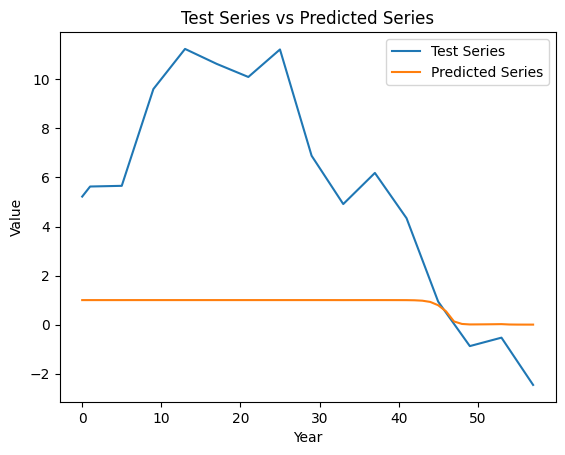

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a line chart
plt.plot(a_test_scaled, label='Test Series')
plt.plot(predicted_rates, label='Predicted Series')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Test Series vs Predicted Series')

# Add a legend
plt.legend()

# Display the chart
plt.show()


## **Parameter Tuning**

In [ ]:
import warnings

warnings.filterwarnings("ignore")




In [ ]:
# Define the parameter combinations to try
order_combinations = [(1, 1, 0), (2, 1, 0), (1, 2, 0),(1, 20, 0),(1, 20, 1),(0, 20, 0)]  # Replace with your desired parameter combinations

# Initialize variables to store the best model and its performance
best_mae = np.inf
best_order = None

# Iterate over the parameter combinations
for order in order_combinations:
    # Fit the ARIMA model
    model = ARIMA(ar_train_scaled, order=order)
    model_fit = model.fit()

    # Make predictions on the test set
    ar_predictions_scaled = model_fit.predict(start=len(ar_train_scaled), end=len(ar_train_scaled) + len(ar_test_scaled) - 1)

    # Inverse transform the predictions to obtain the original scale
    predictions = scaler.inverse_transform(ar_predictions_scaled.reshape(-1, 1)).flatten()

    # Calculate MAE
    mae = mean_absolute_error(ar_test_scaled, ar_predictions_scaled)

    # Check if the current model outperforms the best model
    if mae < best_mae:
        best_mae = mae
        best_order = order


print("Best Order: ",best_order)
print("Best MAE: ",best_mae)

Best Order:  (2, 1, 0)
Best MAE:  8.426926576445204
